<a href="https://colab.research.google.com/github/DingLi23/s2search/blob/pipelining/pipelining/exp-csgl/exp-csgl_csgl_shapley_value.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Experiment Description



> This notebook is for experiment \<exp-csgl\> and data sample \<csgl\>.

### Initialization

In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np, sys, os
sys.path.insert(1, '../../')

from shapley_value import compute_shapley_value, feature_key_list

sv = compute_shapley_value('exp-csgl', 'csgl')


### Plotting

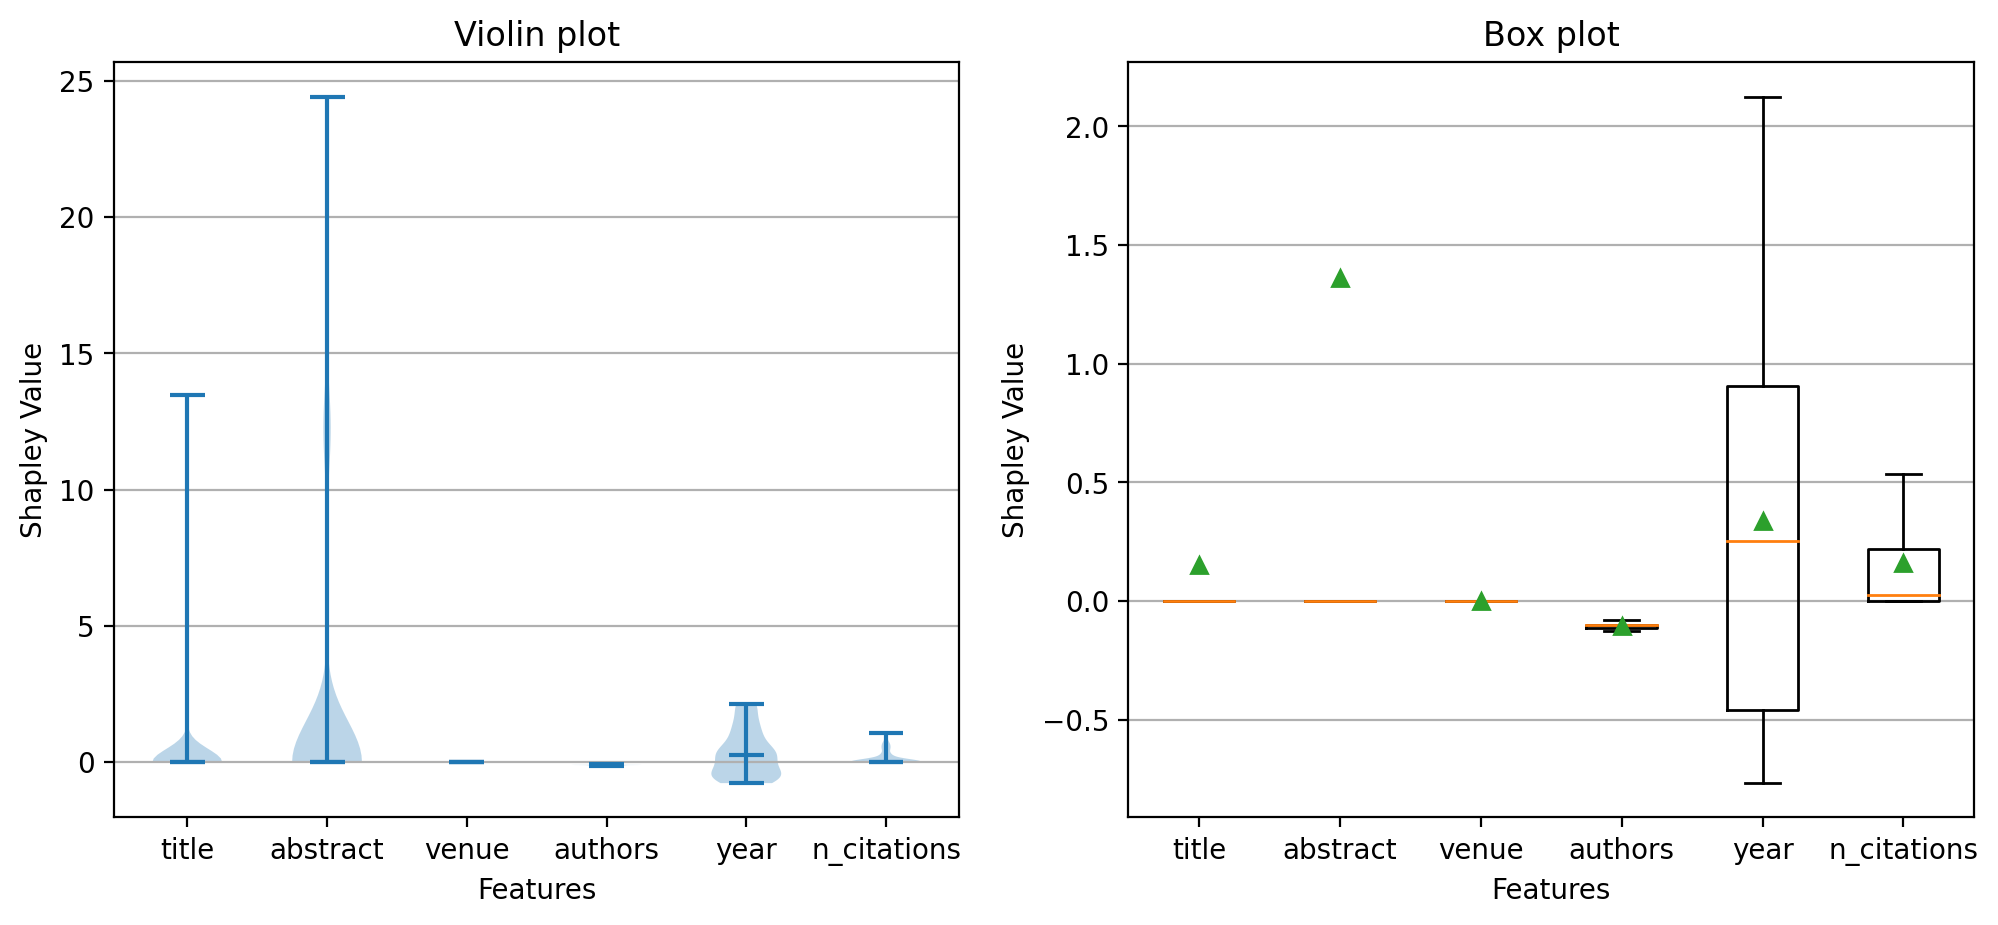

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from s2search_score_pdp import pdp_based_importance

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=200)

# generate some random test data
all_data = []
average_sv = []
sv_global_imp = []

for player_sv in [f'{player}_sv' for player in feature_key_list]:
    all_data.append(sv[player_sv])
    average_sv.append(pdp_based_importance(sv[player_sv]))
    sv_global_imp.append(np.mean(np.abs(list(sv[player_sv]))))
    # average_sv.append(np.std(sv[player_sv]))
    # print(np.max(sv[player_sv]))

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data, 
               showfliers=False, 
               showmeans=True,
               )
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['title', 'abstract', 'venue', 'authors', 'year', 'n_citations'])
    ax.set_xlabel('Features')
    ax.set_ylabel('Shapley Value')

plt.show()


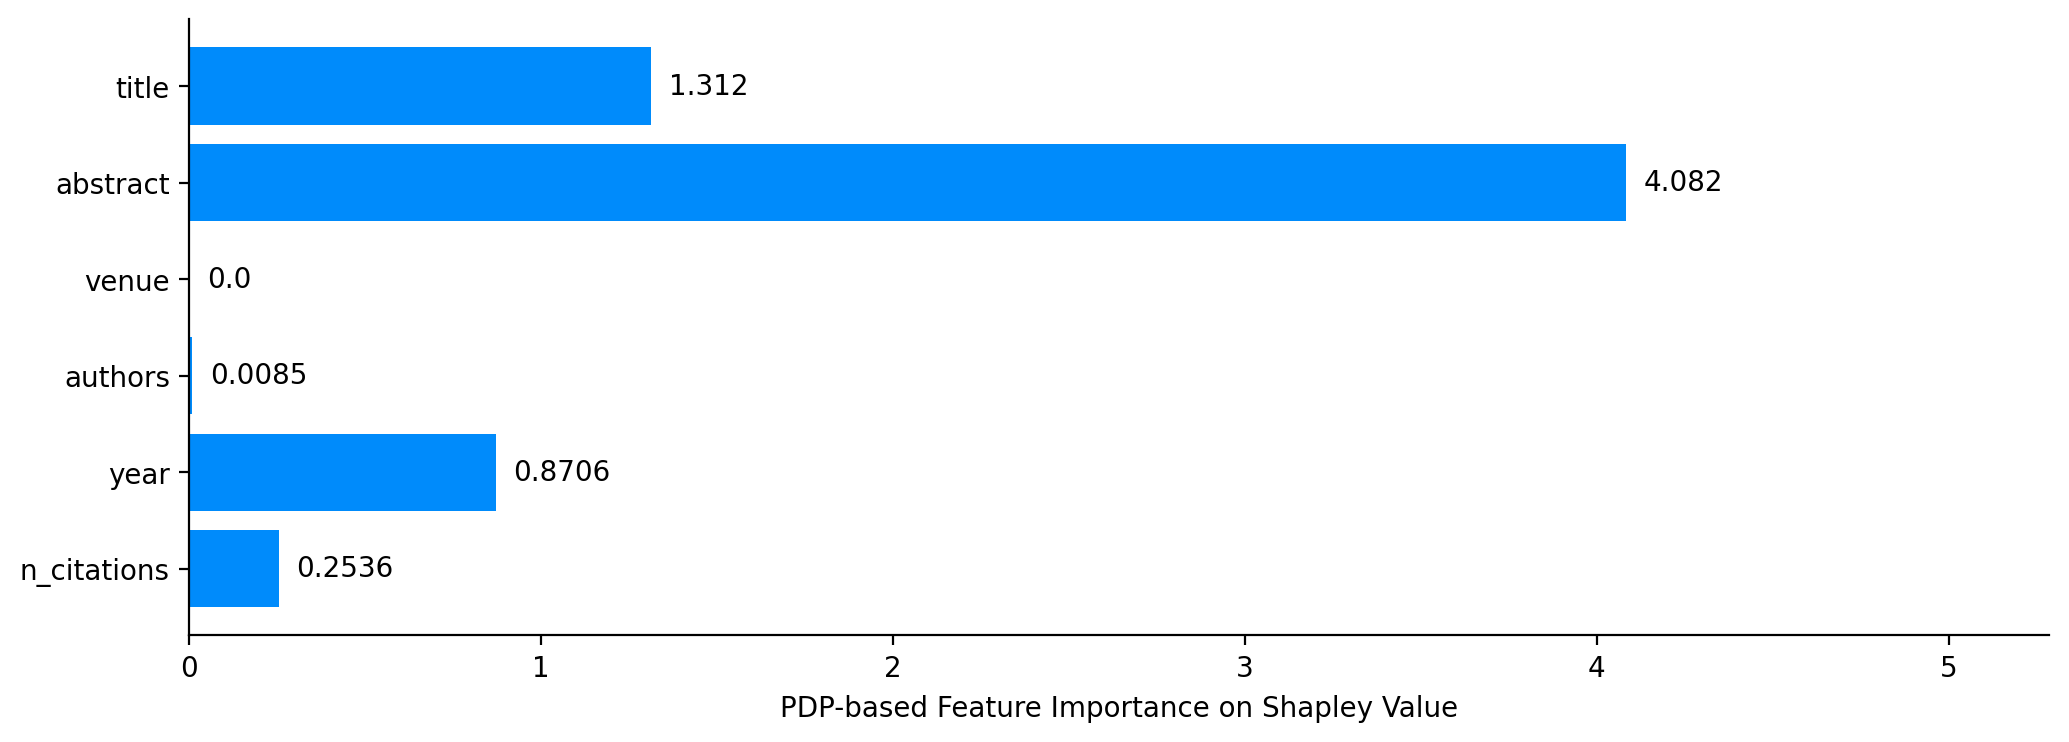

In [3]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(12, 4), dpi=200)

# Example data
feature_names = ('title', 'abstract', 'venue', 'authors', 'year', 'n_citations')
y_pos = np.arange(len(feature_names))
# error = np.random.rand(len(feature_names))

# ax.xaxis.grid(True)
ax.barh(y_pos, average_sv, align='center', color='#008bfb')
ax.set_yticks(y_pos, labels=feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('PDP-based Feature Importance on Shapley Value')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_, xmax = plt.xlim()
plt.xlim(0, xmax + 1)
for i, v in enumerate(average_sv):
    margin = 0.05
    ax.text(v + margin if v > 0 else margin, i, str(round(v, 4)), color='black', ha='left', va='center')

plt.show()


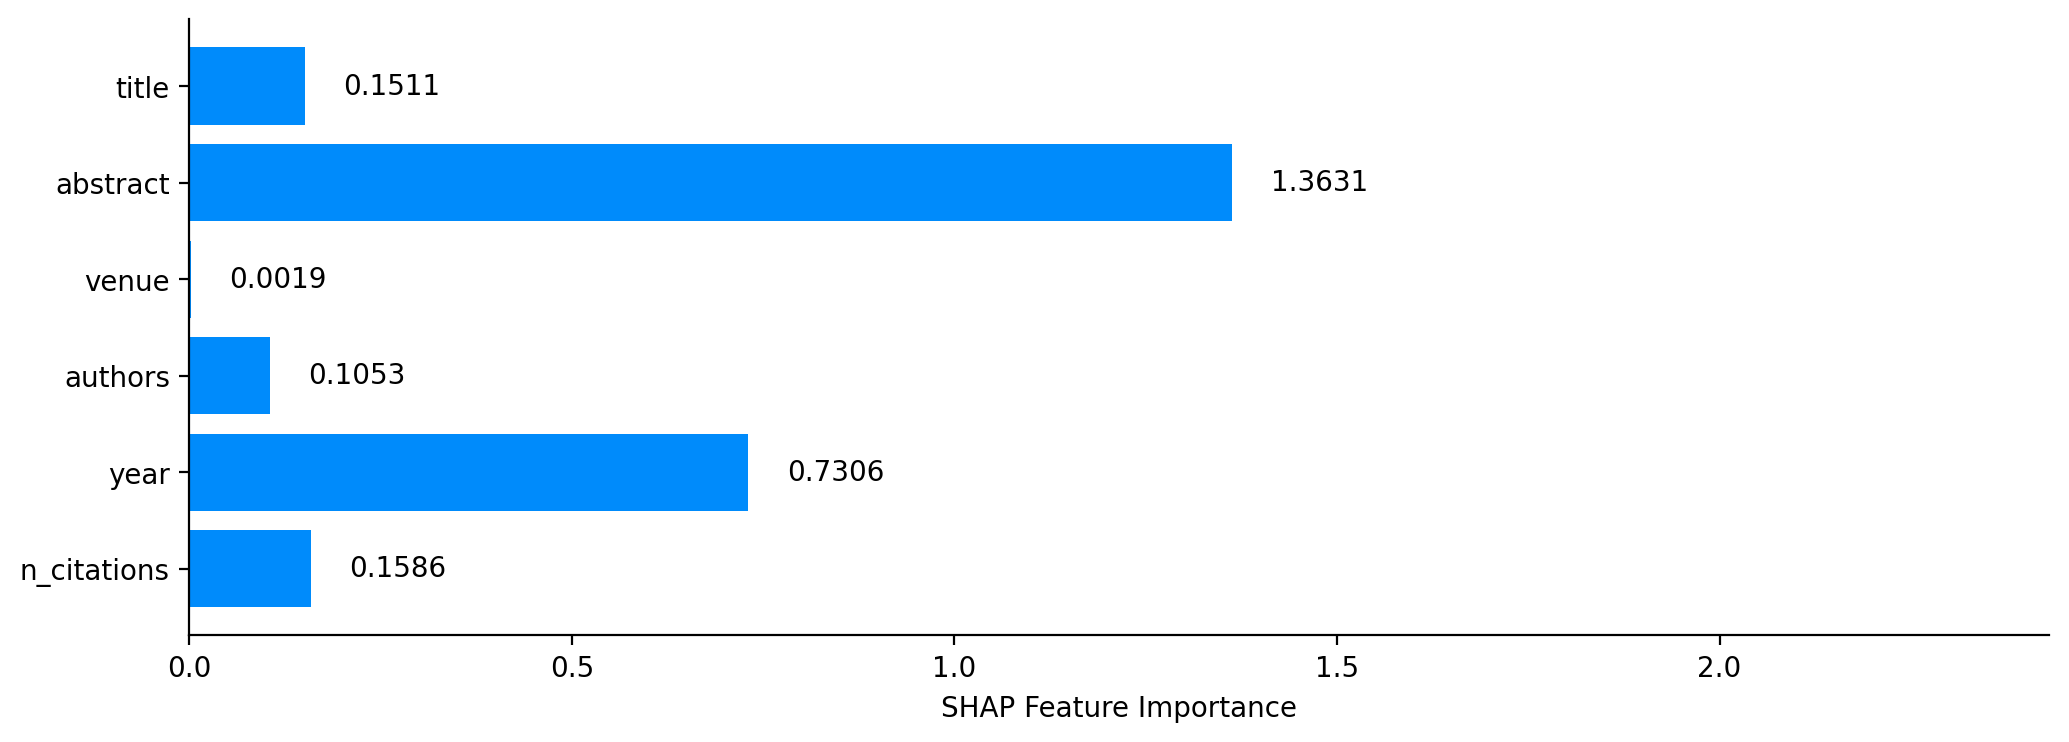

In [4]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(12, 4), dpi=200)

# Example data
feature_names = ('title', 'abstract', 'venue', 'authors', 'year', 'n_citations')
y_pos = np.arange(len(feature_names))
# error = np.random.rand(len(feature_names))

# ax.xaxis.grid(True)
ax.barh(y_pos, sv_global_imp, align='center', color='#008bfb')
ax.set_yticks(y_pos, labels=feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('SHAP Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_, xmax = plt.xlim()
plt.xlim(0, xmax + 1)
for i, v in enumerate(sv_global_imp):
    margin = 0.05
    ax.text(v + margin if v > 0 else margin, i, str(round(v, 4)), color='black', ha='left', va='center')

plt.show()
